### Student Information
Name:

Student ID:

GitHub ID:

---

### Instructions

### First Phase Submission

1. First: do the **take home** exercises in the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) that considered as **phase 1 (from exercise 1 to exercise 15)**. You can answer in the master file. __This part is worth 10% of your grade.__


2. Second: follow the same process from the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) on **the new dataset** up **until phase 1**. You can skip some exercises if you think some steps are not necessary. However main exercises should be completed. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 15% of your grade.__
    -  Use [the new dataset](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/newdataset/Reddit-stock-sentiment.csv). The dataset contains a 16 columns including 'text' and 'label', with the sentiment labels being: 1.0 is positive, 0.0 is neutral and -1.0 is negative. You can simplify the dataset and use only the columns that you think are necessary. 
    
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.
    - Use this file to complete the homework from the second part. Make sure the code can be run from the beginning till the end and has all the needed output.


3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 10% of your grade.__
    - Generate meaningful **new data visualizations**. Refer to online resources and the Data Mining textbook for inspiration and ideas. 
    


4. Fourth: It's hard for us to follow if your code is messy, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 5% of your grade.__

You can submit your homework following these guidelines: [DM2025-Lab1-announcement](https://github.com/leoson-wu/DM2025-Lab1-Announcement/blob/main/README.md). Make sure to commit and save your changes to your repository __BEFORE the deadline (September 28th 11:59 pm, Sunday)__. 

### Second Phase Submission 

**You can keep the answer for phase 1 for easier running and update the phase 2 on the same page.**

1. First: Continue doing the **take home** exercises in the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) for **phase 2, starting from Finding frequent patterns**. Use the same master(.ipynb) file. Answer from phase 1 will not be considered at this stage. You can answer in the master file. __This part is worth 10% of your grade.__


2. Second: Continue from first phase and do the same process from the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) on **the new dataset** for phase 2, starting from Finding frequent pattern. You can skip some exercises if you think some steps are not necessary. However main exercises should be completed. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 15% of your grade.__
    - Continue using this file to complete the homework from the second part. Make sure the code can be run from the beginning till the end and has all the needed output. Use the same new dataset as in phase 1.
    
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.

3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 20% of your grade.__
    - Use this file to answer.
    - Generate **TF-IDF features** from the tokens of each text. This will generating a document matrix, however, the weights will be computed differently (using the TF-IDF value of each word per document as opposed to the word frequency).  Refer to this Scikit-learn [guide](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) .
    - Implement a simple **Naive Bayes classifier** that automatically classifies the records into their categories. Use both the TF-IDF features and word frequency features to build two seperate classifiers. Note that for the TF-IDF features you might need to use other type of NB classifier different than the one in the Master Notebook. Comment on the differences and when using augmentation with feature pattern.  Refer to this [article](https://hub.packtpub.com/implementing-3-naive-bayes-classifiers-in-scikit-learn/).


4. Fourth: In the lab, we applied each step really quickly just to illustrate how to work with your dataset. There are somethings that are not ideal or the most efficient/meaningful. Each dataset can be handled differently as well. What are those inefficent parts you noticed? How can you improve the Data preprocessing for these specific datasets? __This part is worth 10% of your grade.__


5. Fifth: It's hard for us to follow if your code is messy, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 5% of your grade.__


You can submit your homework following these guidelines: [DM2025-Lab1-announcement](https://github.com/leoson-wu/DM2025-Lab1-Announcement/blob/main/README.md). Make sure to commit and save your changes to your repository __BEFORE the deadline (October 19th 11:59 pm, Sunday)__. 

# Phase 1

set up and check dataset

In [192]:
### Begin Assignment Here
# test code for environment setup
import pandas as pd
import numpy as np
import nltk

from sklearn.feature_extraction.text import CountVectorizer
import plotly as py
import math

import PAMI
import umap


file_path = './newdataset/Reddit-stock-sentiment.csv'  # 調整路徑到你的檔案
df = pd.read_csv(file_path)


# 看前幾筆
df.head()


,type,datetime,post_id,subreddit,title,author,url,upvotes,downvotes,upvote_ratio,text,subjectivity,polarity,sentiment,entities,label
0,comment,2025-04-11 17:29:56,mmli62w,wallstreetbets,Retardation is on the menu boys! WSB is so back,StickyTip420,https://i.redd.it/0yq2ftren8ue1.jpeg,0,NaN,NaN,Calls on retards,1.000000,-0.900000,-1.0,[],-1.0
1,comment,2025-04-12 1:12:19,mmnu7v9,wallstreetbets,Retail giant TARGET has now declined for 10 co...,Comfortable-Dog-8437,https://i.redd.it/7tl6puv9waue1.jpeg,-15,NaN,NaN,Stunt as in like why did they even make a big ...,0.177778,0.083333,1.0,"['Stunt', 'company', 'deal', 'place']",0.0
2,comment,2025-04-10 15:09:41,mmeevio,StockMarket,How do you feel about a sitting president maki...,Btankersly66,https://apnews.com/article/trump-truth-social-...,1,NaN,NaN,Seeing lots of red in the ticker.,0.000000,0.000000,0.0,['ticker'],0.0
3,post,2023-08-30 17:12:55,165kllm,stockstobuytoday,Who knows more? $VMAR,emiljenfn,https://www.reddit.com/r/stockstobuytoday/comm...,30,0.0,0.98,Vision Marine Technologies Inc. is rewriting t...,0.646970,0.216383,1.0,"['watercraft', 'skill', 'power', ']', 'feat', ...",1.0
4,comment,2025-04-11 14:48:05,mmkl6bw,StockMarket,The Trump administration is begging Xi Jinping...,Just-Big6411,https://edition.cnn.com/2025/04/10/politics/tr...,1,NaN,NaN,He didn’t say thank you.,0.000000,0.000000,0.0,[],-1.0


In [193]:
for i, row in df.head(3).iterrows():
    print(f"Title: {row['title']}")
    print(f"Text: {row['text']}\n")

Title: Retardation is on the menu boys! WSB is so back
Text: Calls on retards

Title: Retail giant TARGET has now declined for 10 consecutive weeks, its longest losing streak in history
Text: Stunt as in like why did they even make a big deal about starting it in the first place? No company should ever talk about politics ever.

Title: How do you feel about a sitting president making $415M in one day after pumping his own stock with social media and a policy decision?
Text: Seeing lots of red in the ticker.



In [194]:
df[df["subreddit"]=="StockMarket"][::10][0:5]

,type,datetime,post_id,subreddit,title,author,url,upvotes,downvotes,upvote_ratio,text,subjectivity,polarity,sentiment,entities,label
2,comment,2025-04-10 15:09:41,mmeevio,StockMarket,How do you feel about a sitting president maki...,Btankersly66,https://apnews.com/article/trump-truth-social-...,1,NaN,NaN,Seeing lots of red in the ticker.,0.00,0.00,0.0,['ticker'],0.0
62,comment,2025-04-11 16:11:48,mml28yw,StockMarket,The Trump administration is begging Xi Jinping...,FumblersUnited,https://edition.cnn.com/2025/04/10/politics/tr...,1,NaN,NaN,Comedy gold :)),1.00,0.50,1.0,"['Comedy', 'gold']",-1.0
94,comment,2025-04-11 15:15:20,mmkqpao,StockMarket,Trump: We Are Doing Really Well On Our Tariff ...,AKACharlieRock,https://i.redd.it/uajqu4kxl7ue1.png,1,NaN,NaN,I can’t take four years of lying. Help!,0.00,0.00,0.0,['Help'],0.0
113,comment,2025-04-11 10:04:54,mmjdl3n,StockMarket,🚨China responds to Trump’s 145% tariff with an...,Appropriate-Dog6645,https://i.redd.it/2f7y4h6226ue1.jpeg,2,NaN,NaN,\r\nAn evil man will burn his own nation to th...,1.00,-1.00,-1.0,"['Sun', 'man', 'ground', 'nation', 'Tzu']",0.0
146,comment,2025-04-11 14:46:24,mmkku1z,StockMarket,$ U.S. dollar value (crashing),-Lysergian,https://i.redd.it/atvlo83gk4ue1.jpeg,1,NaN,NaN,He reached this level only because of his inhe...,0.25,0.25,1.0,"['reason', 'pauper', 'level', 'everything', 'i...",-1.0


check and fix missing value


In [195]:
# check missing values
import helpers.data_mining_helpers as dmh
df.isnull().apply(lambda df: dmh.check_missing_values(df),axis =1)



0      (The amoung of missing records is: , 2)
1      (The amoung of missing records is: , 2)
2      (The amoung of missing records is: , 2)
3      (The amoung of missing records is: , 0)
4      (The amoung of missing records is: , 2)
                        ...                   
842    (The amoung of missing records is: , 2)
843    (The amoung of missing records is: , 2)
844    (The amoung of missing records is: , 0)
845    (The amoung of missing records is: , 2)
846    (The amoung of missing records is: , 2)
Length: 847, dtype: object

In [196]:
df.isnull().apply(lambda df: dmh.check_missing_values(df))

,type,datetime,post_id,subreddit,title,author,url,upvotes,downvotes,upvote_ratio,text,subjectivity,polarity,sentiment,entities,label
0,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:
1,0,0,0,0,0,0,0,0,783,783,0,0,0,0,0,0


In [197]:


# 將 upvotes 負值轉成正值
df['upvotes'] = df['upvotes'].abs()

# 將缺失的 downvotes 視為 0
df['downvotes'] = df['downvotes'].fillna(0)

# 計算 upvote_ratio
df['upvote_ratio'] = df['upvotes'] / (df['upvotes'] + df['downvotes'])

# 若分母為 0（即 upvotes=0 且 downvotes=0），可以設為 NaN 或 0
df['upvote_ratio'] = df['upvote_ratio'].fillna(0)

# 看前幾筆結果
df[['upvotes', 'downvotes', 'upvote_ratio']].head()


,upvotes,downvotes,upvote_ratio
0,0,0.0,0.0
1,15,0.0,1.0
2,1,0.0,1.0
3,30,0.0,1.0
4,1,0.0,1.0


In [198]:
df.isnull().apply(lambda df: dmh.check_missing_values(df))

,type,datetime,post_id,subreddit,title,author,url,upvotes,downvotes,upvote_ratio,text,subjectivity,polarity,sentiment,entities,label
0,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [199]:

sum(df.duplicated('text'))

23

In [200]:
len(df)


847

In [201]:
# 找出 text 欄位重複的資料
duplicates = df[df.duplicated('text', keep=False)]
print(duplicates)

        type             datetime  post_id         subreddit  \
34   comment  2021-02-01 13:45:52  gllif2v            stocks   
42   comment  2021-02-01 13:45:17  gllicpw            stocks   
70      post  2025-03-29 18:14:28  1jmshlc  stockstobuytoday   
105     post   2025-04-04 9:01:07  1jr7fe1  stockstobuytoday   
159     post  2025-04-11 13:54:31  1jwqgce  stockstobuytoday   
160     post  2025-04-03 12:18:32  1jqgwyz  stockstobuytoday   
179     post  2025-03-25 15:47:42  1jjmipo  stockstobuytoday   
192     post  2025-03-21 21:15:20  1jgrs02  stockstobuytoday   
284     post  2025-04-06 16:00:59  1jsxft7  stockstobuytoday   
349     post  2025-03-22 18:14:30  1jhestv  stockstobuytoday   
352     post  2025-04-08 12:18:30  1juc5fs  stockstobuytoday   
387     post  2025-03-24 15:47:30  1jituo3  stockstobuytoday   
409     post  2025-03-25 12:30:39  1jji7cr  stockstobuytoday   
421     post  2025-03-31 14:05:30  1jo3zpc  stockstobuytoday   
432     post  2025-04-11 16:01:14  1jwte

In [202]:


# 先確保 text 是純文字
df['text'] = df['text'].astype(str)

# 只針對重複的 text 去挑最大 upvote
mask = df.duplicated('text', keep=False)
df_dup = df[mask].copy()
df_unique = df[~mask].copy()

# 對重複的 text 保留 upvotes 最大的那筆
df_dup = df_dup.loc[df_dup.groupby('text')['upvotes'].idxmax()]

# 合併回去
df = pd.concat([df_unique, df_dup]).reset_index(drop=True)

In [203]:
len(df)

824

In [204]:

sum(df.duplicated('text'))

0

set up sample and see the comparisoin 

In [205]:
df_sample = df.sample(n=300) #random state
df_sample[0:4]

,type,datetime,post_id,subreddit,title,author,url,upvotes,downvotes,upvote_ratio,text,subjectivity,polarity,sentiment,entities,label
206,comment,2021-10-10 13:19:44,hg3ml1y,stockstobuytoday,I got 350$ what do I invest in?,Civil-Translator-196,https://www.reddit.com/r/stockstobuytoday/comm...,2,0.0,1.0,"cyberlux long term investment, you wont be upset",0.400,-0.05,-1.0,"['investment', 'cyberlux', 'term']",1.0
558,comment,2025-04-11 13:46:31,mmk903a,stocks,BREAKING: China raises tariffs on U.S. goods t...,redditissocoolyoyo,https://www.reddit.com/r/stocks/comments/1jwku...,1,0.0,1.0,Also think about infrastructure related items ...,0.575,0.10,1.0,"['Ethernet', 'stuff', 'infrastructure', 'impac...",-1.0
477,comment,2021-10-28 23:17:18,hig0ry6,stockstobuytoday,"$BKKT - Mastercard, Crypto currency - while pe...",Nativefly,https://www.reddit.com/r/stockstobuytoday/comm...,1,0.0,1.0,So wait for the dip?,0.000,0.00,0.0,"['dip', 'wait']",0.0
744,post,2025-03-28 14:01:16,1jlvrmn,stockstobuytoday,Undervalued Stocks,AutoModerator,https://www.reddit.com/r/stockstobuytoday/comm...,2,0.0,1.0,Stocks that are undervalued and potential to t...,1.000,0.00,0.0,"['trend', 'stockbuyvest.com', 'Undervalued', '...",1.0


In [206]:
# 比較資料量
print("原始資料列數:", df.shape[0])
print("抽樣後資料列數:", df_sample.shape[0])

# 查看前幾列
print(df_sample.head())

# 查看索引是否保留原索引
print(df_sample.index)

# 取得 category 統計摘要並加上後綴
desc_X = df.describe().add_suffix('_原始')
desc_sample = df_sample.describe().add_suffix('_抽樣')

# 合併
compare = pd.concat([desc_X, desc_sample], axis=1)
compare


原始資料列數: 824
抽樣後資料列數: 300
        type             datetime  post_id         subreddit  \
206  comment  2021-10-10 13:19:44  hg3ml1y  stockstobuytoday   
558  comment  2025-04-11 13:46:31  mmk903a            stocks   
477  comment  2021-10-28 23:17:18  hig0ry6  stockstobuytoday   
744     post  2025-03-28 14:01:16  1jlvrmn  stockstobuytoday   
99   comment   2025-04-12 2:43:41  mmo89e9    wallstreetbets   

                                                 title                author  \
206                    I got 350$ what do I invest in?  Civil-Translator-196   
558  BREAKING: China raises tariffs on U.S. goods t...    redditissocoolyoyo   
477  $BKKT - Mastercard, Crypto currency - while pe...             Nativefly   
744                                 Undervalued Stocks         AutoModerator   
99                    Someone post the hotline please.      Pernicious-Peach   

                                                   url  upvotes  downvotes  \
206  https://www.reddit.com/r/s

,upvotes_原始,downvotes_原始,upvote_ratio_原始,subjectivity_原始,polarity_原始,sentiment_原始,label_原始,upvotes_抽樣,downvotes_抽樣,upvote_ratio_抽樣,subjectivity_抽樣,polarity_抽樣,sentiment_抽樣,label_抽樣
count,824.000000,824.000000,824.000000,824.000000,824.000000,824.000000,824.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000
mean,13.057039,0.020631,0.971858,0.353902,0.037746,0.145631,-0.251214,10.460000,0.040000,0.962930,0.340218,0.051127,0.200000,-0.273333
std,144.043172,0.410449,0.164839,0.317379,0.300796,0.775165,0.671408,66.717307,0.637512,0.188287,0.316529,0.298958,0.749582,0.648091
min,0.000000,0.000000,0.000000,0.000000,-1.000000,-1.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,-1.000000,-1.000000
25%,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,-1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,-1.000000
50%,1.000000,0.000000,1.000000,0.374802,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.344841,0.000000,0.000000,0.000000
75%,4.000000,0.000000,1.000000,0.590833,0.160000,1.000000,0.000000,4.000000,0.000000,1.000000,0.552370,0.180000,1.000000,0.000000
max,3943.000000,11.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1105.000000,11.000000,1.000000,1.000000,1.000000,1.000000,1.000000


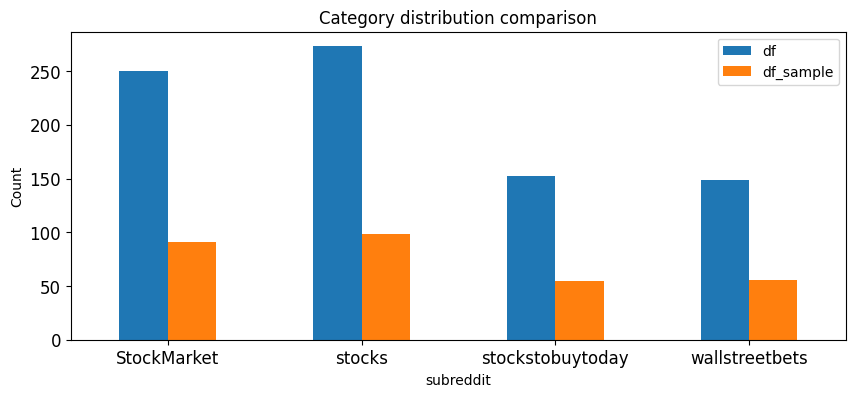

In [207]:
import matplotlib.pyplot as plt

categories = ['stockstobuytoday' 'stocks' 'wallstreetbets' 'StockMarket']
# 計算每個 category 的數量
count_df_sample = df_sample['subreddit'].value_counts()
count_df = df['subreddit'].value_counts()

# 將兩個 Series 合併成 DataFrame
df_counts = pd.DataFrame({ 'df': count_df,'df_sample': count_df_sample}).fillna(0)

# 畫群組直條圖
df_counts.plot(kind='bar', figsize=(10,4), fontsize=12, rot=0, title='Category distribution comparison')
plt.ylabel('Count')
plt.show()

Feature creation



In [208]:
import nltk
nltk.download("punkt")
nltk.download("punkt_tab")
nltk.download('stopwords')     # 用於停用詞過濾
nltk.download('averaged_perceptron_tagger')  # 用於詞性標註（如果 tokenize_text 有用到）

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\hansw\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\hansw\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\hansw\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\hansw\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [209]:
df['unigrams'] = df['text'].apply(lambda df: dmh.tokenize_text(df))
df.head()["unigrams"]

0                                 [Calls, on, retards]
1    [Stunt, as, in, like, why, did, they, even, ma...
2          [Seeing, lots, of, red, in, the, ticker, .]
3    [Vision, Marine, Technologies, Inc., is, rewri...
4                 [He, didn, ’, t, say, thank, you, .]
Name: unigrams, dtype: object

Feature subset selection

In [210]:
from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer()
df_counts = count_vect.fit_transform(df.text) #learn the vocabulary and return document-term matrix
print(df_counts[0])

<Compressed Sparse Row sparse matrix of dtype 'int64'
	with 3 stored elements and shape (1, 4346)>
  Coords	Values
  (0, 692)	1
  (0, 2706)	1
  (0, 3248)	1


In [211]:
analyze = count_vect.build_analyzer()
print(df.text[0])
analyze(df.text[0])

Calls on retards


['calls', 'on', 'retards']

In [212]:
df_counts.shape

(824, 4346)

In [213]:
count_vect.get_feature_names_out()[0:10]

array(['00', '000', '01378', '02', '027', '03', '06', '08', '10', '100'],
      dtype=object)

In [214]:
df_counts[0:5, 0:100].toarray()

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0,

In [215]:
count_vect.get_feature_names_out()[0:1]

array(['00'], dtype=object)

In [216]:
vocab = count_vect.get_feature_names_out()
record_5 = df_counts[4]
indices = record_5.nonzero()[1]
words = [vocab[i] for i in indices]
print(words)

['he', 'didn', 'say', 'thank', 'you']


In [217]:
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 只取前 20 筆資料
df_small = df.head(20)

# 建立 CountVectorizer
count_vect = CountVectorizer()
X_counts = count_vect.fit_transform(df_small['text'])


In [218]:
# 前 20 個詞
plot_x = count_vect.get_feature_names_out()[0:20]

# 前 20 個文件索引
plot_y = ["doc_"+ str(i) for i in df_small.index]

# 前 20x20 的矩陣
plot_z = X_counts[0:20, 0:20].toarray()

# 轉成 DataFrame 方便 seaborn 畫圖
df_todraw = pd.DataFrame(plot_z, columns=plot_x, index=plot_y)


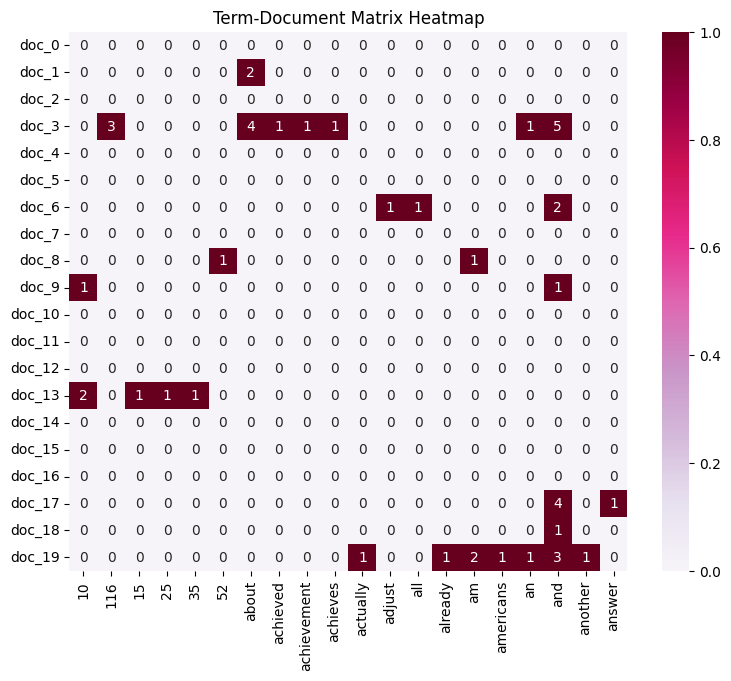

In [219]:
plt.figure(figsize=(9,7))
sns.heatmap(df_todraw, cmap="PuRd", vmin=0, vmax=1, annot=True)
plt.title("Term-Document Matrix Heatmap")
plt.show()


Transform text data

In [220]:
term_frequencies = []
for j in range(0,df_counts.shape[1]):
    term_frequencies.append(sum(df_counts[:,j].toarray()))

In [221]:
term_frequencies = np.asarray(X_counts.sum(axis=0))[0]
term_frequencies[0] #sum of first term: 00

np.int64(3)

C:\Users\hansw\AppData\Local\Temp\ipykernel_15332\1447429508.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  g.set_xticklabels(count_vect.get_feature_names_out()[:300], rotation = 90);


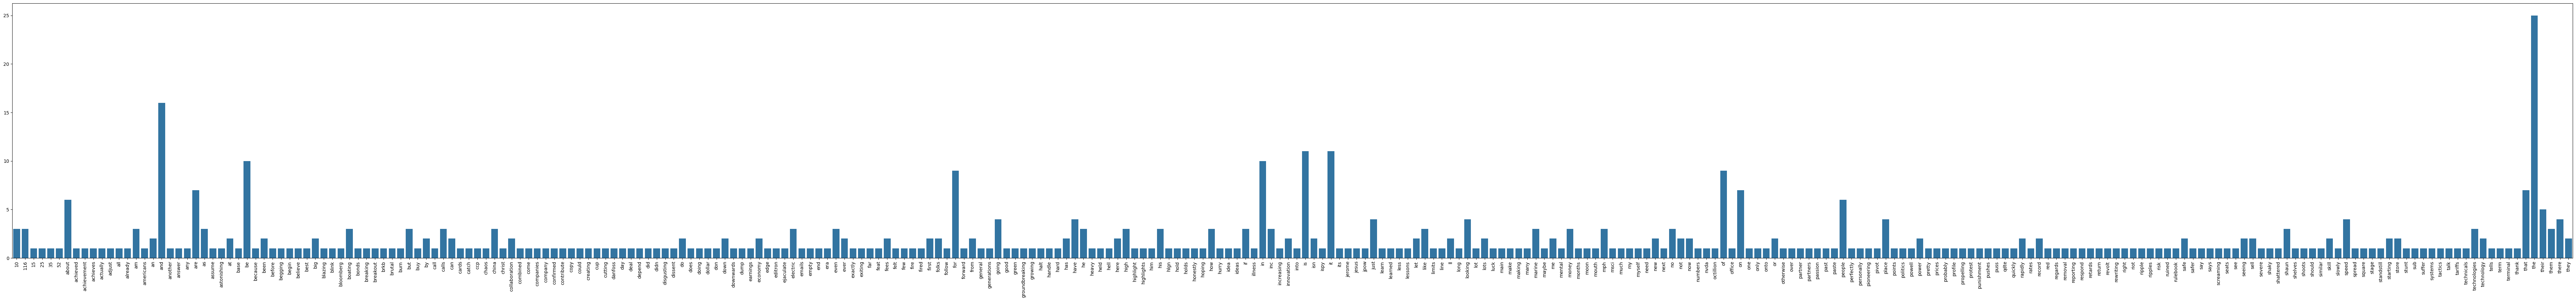

In [222]:
import seaborn as sns
plt.subplots(figsize=(100, 10))
g = sns.barplot(x=count_vect.get_feature_names_out()[:300], 
            y=term_frequencies[:300])
g.set_xticklabels(count_vect.get_feature_names_out()[:300], rotation = 90);

C:\Users\hansw\AppData\Local\Temp\ipykernel_15332\1632463425.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_terms, y=top_counts, palette="viridis")


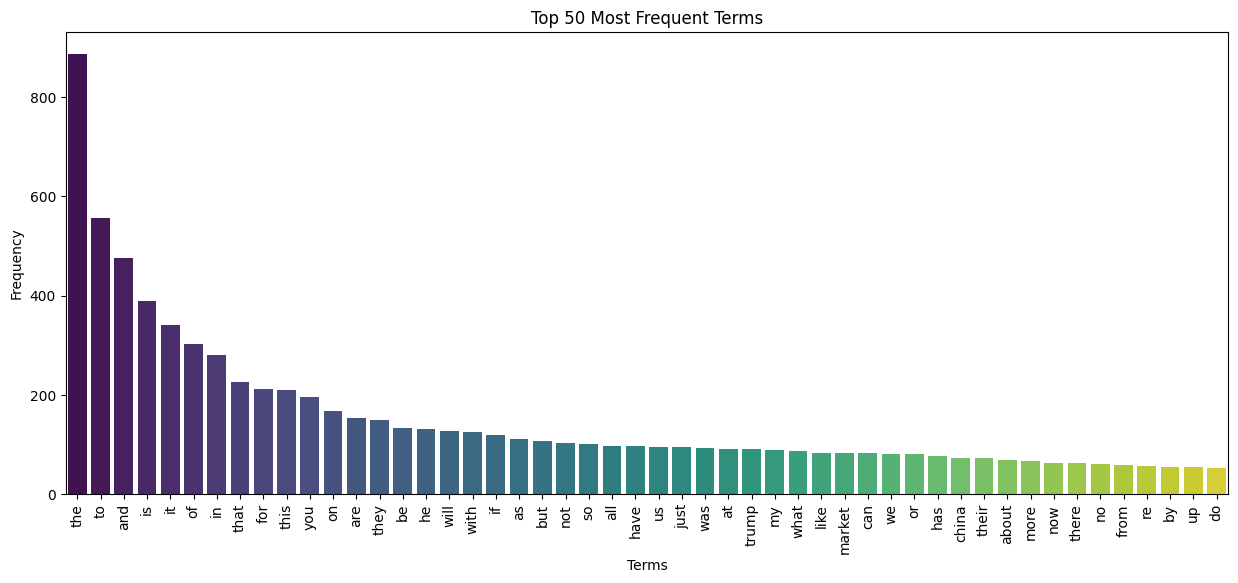

C:\Users\hansw\AppData\Local\Temp\ipykernel_15332\1632463425.py:44: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_var_terms, y=top_var_counts, palette="magma")


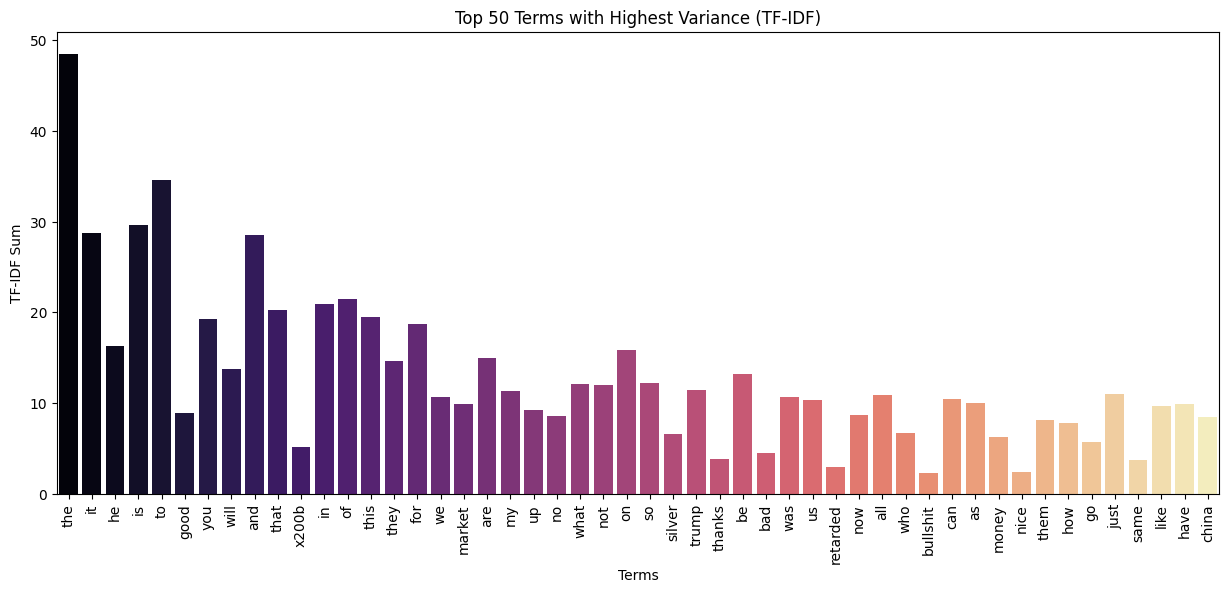

In [223]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# -----------------------------
# 1️⃣ 前 50 個最常出現的詞（用 CountVectorizer 計算頻率）
# -----------------------------
count_vect = CountVectorizer()
X_count = count_vect.fit_transform(df['text'])
term_frequencies = np.array(X_count.sum(axis=0)).flatten()

top_n = 50
top_indices = term_frequencies.argsort()[::-1][:top_n]
top_terms = count_vect.get_feature_names_out()[top_indices]
top_counts = term_frequencies[top_indices]

plt.figure(figsize=(15,6))
sns.barplot(x=top_terms, y=top_counts, palette="viridis")
plt.xticks(rotation=90)
plt.title("Top 50 Most Frequent Terms")
plt.xlabel("Terms")
plt.ylabel("Frequency")
plt.show()


# -----------------------------
# 2️⃣ 變異數最高的 50 個詞（用 TF-IDF 計算）
# -----------------------------
tfidf_vect = TfidfVectorizer()
X_tfidf = tfidf_vect.fit_transform(df['text'])

# 計算每個特徵的變異數
term_variances = X_tfidf.toarray().var(axis=0)
top_var_indices = term_variances.argsort()[::-1][:50]

# 用 TF-IDF 的特徵名稱
top_var_terms = tfidf_vect.get_feature_names_out()[top_var_indices]

# 用 TF-IDF 總和當 y 值
top_var_counts = X_tfidf.toarray()[:, top_var_indices].sum(axis=0)

plt.figure(figsize=(15,6))
sns.barplot(x=top_var_terms, y=top_var_counts, palette="magma")
plt.xticks(rotation=90)
plt.title("Top 50 Terms with Highest Variance (TF-IDF)")
plt.xlabel("Terms")
plt.ylabel("TF-IDF Sum")
plt.show()



In [224]:
import math
term_frequencies_log = [math.log(i) for i in term_frequencies]

C:\Users\hansw\AppData\Local\Temp\ipykernel_15332\2166548998.py:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  g.set_xticklabels(count_vect.get_feature_names_out()[:300], rotation = 90);


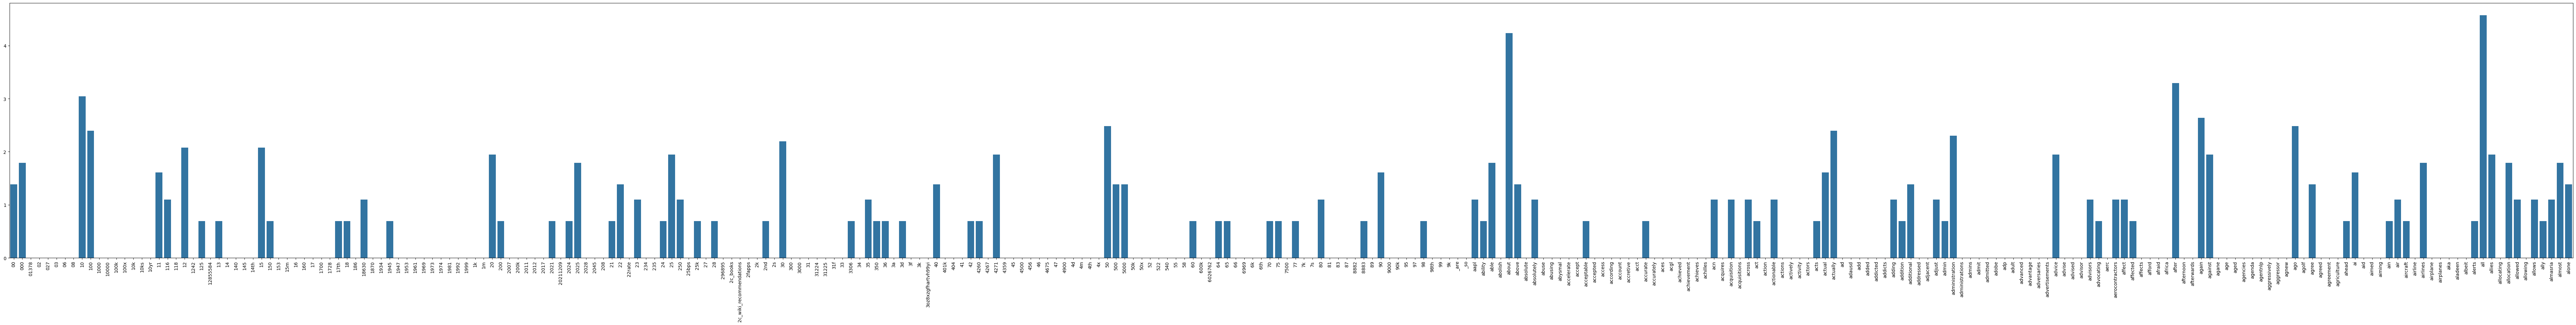

In [225]:
plt.subplots(figsize=(100, 10))
g = sns.barplot(x=count_vect.get_feature_names_out()[:300],
                y=term_frequencies_log[:300])
g.set_xticklabels(count_vect.get_feature_names_out()[:300], rotation = 90);

C:\Users\hansw\AppData\Local\Temp\ipykernel_15332\594430624.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='term', y='count_log', data=df_log_sorted, palette='coolwarm')


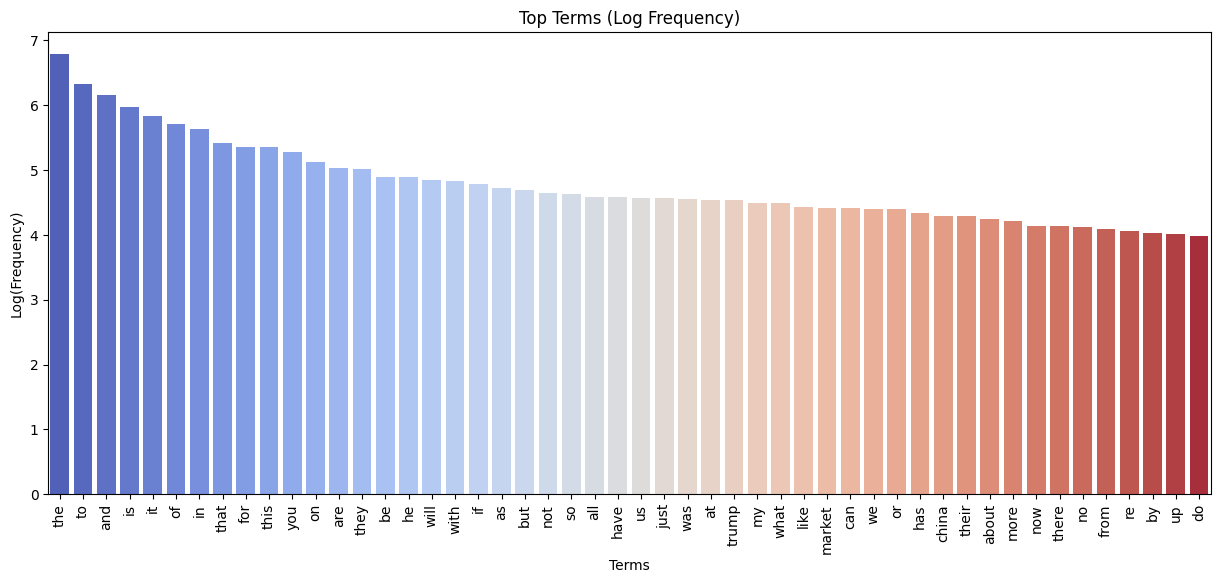

In [226]:


# 假設 top_terms 和 top_counts 已經定義
term_frequencies_log = np.log1p(top_counts)  # log1p = log(1 + x)

# 建立 DataFrame 並排序
df_log = pd.DataFrame({
    'term': top_terms,
    'count_log': term_frequencies_log
})
df_log_sorted = df_log.sort_values(by='count_log', ascending=False)

# 畫圖
plt.figure(figsize=(15,6))
sns.barplot(x='term', y='count_log', data=df_log_sorted, palette='coolwarm')
plt.xticks(rotation=90)
plt.title("Top Terms (Log Frequency)")
plt.xlabel("Terms")
plt.ylabel("Log(Frequency)")
plt.show()


new data visualizations

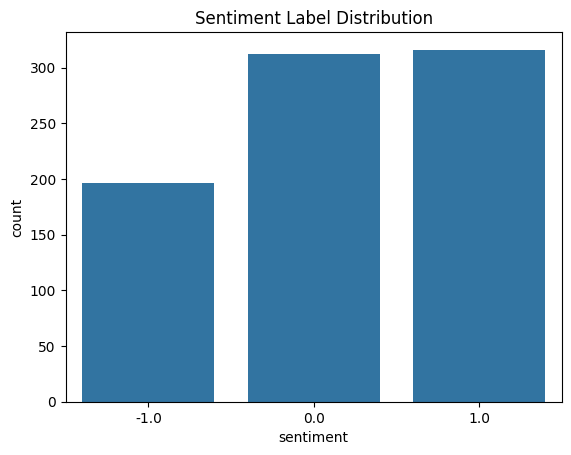

In [227]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.countplot(x='sentiment', data=df)
plt.title("Sentiment Label Distribution")
plt.show()


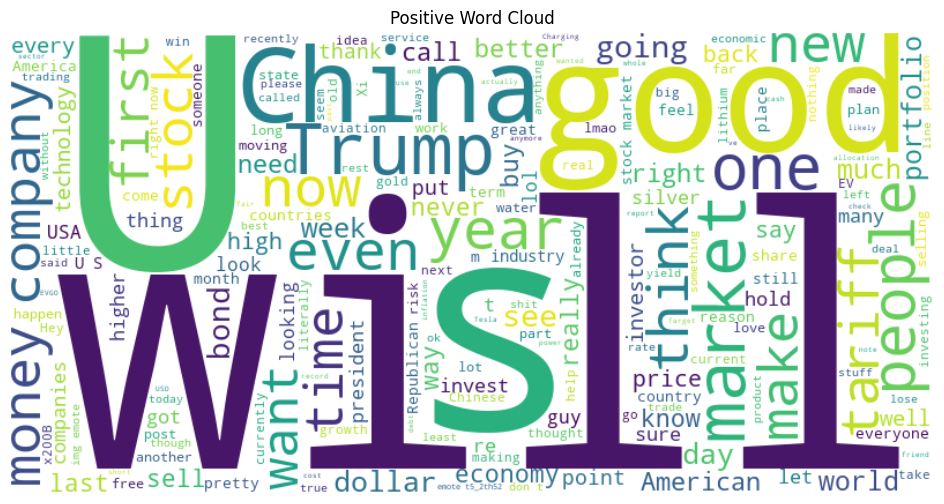

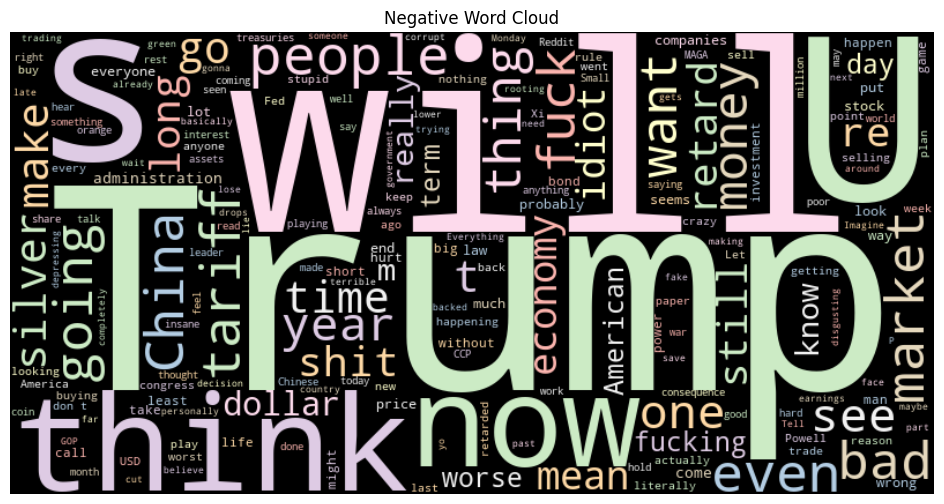

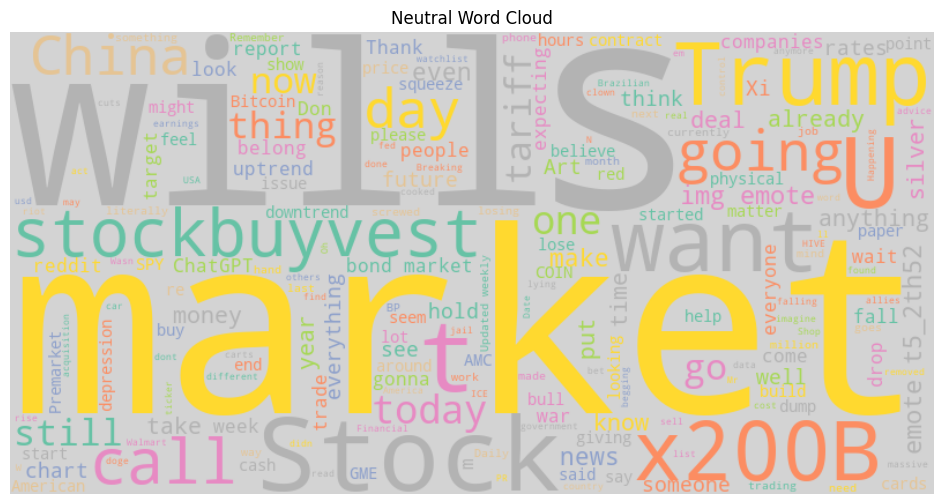

In [228]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# 先把 NaN 填成空字串
df['text'] = df['text'].fillna('')

# 文字分類
positive_text = " ".join(df[df['sentiment']==1.0]['text'])
negative_text = " ".join(df[df['sentiment']==-1.0]['text'])
neutral_text  = " ".join(df[df['sentiment']==0]['text'])

# 生成 WordCloud
def plot_wordcloud(text, title, bg_color='white', colormap=None):
    if not text.strip():
        print(f"No words for {title}")
        return
    wc = WordCloud(width=800, height=400, background_color=bg_color, colormap=colormap).generate(text)
    plt.figure(figsize=(12,6))
    plt.imshow(wc, interpolation='bilinear')
    plt.axis('off')
    plt.title(title)
    plt.show()

plot_wordcloud(positive_text, "Positive Word Cloud", bg_color='white')
plot_wordcloud(negative_text, "Negative Word Cloud", bg_color='black', colormap='Pastel1')
plot_wordcloud(neutral_text, "Neutral Word Cloud", bg_color='lightgrey', colormap='Set2')


C:\Users\hansw\AppData\Local\Temp\ipykernel_15332\1611717989.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


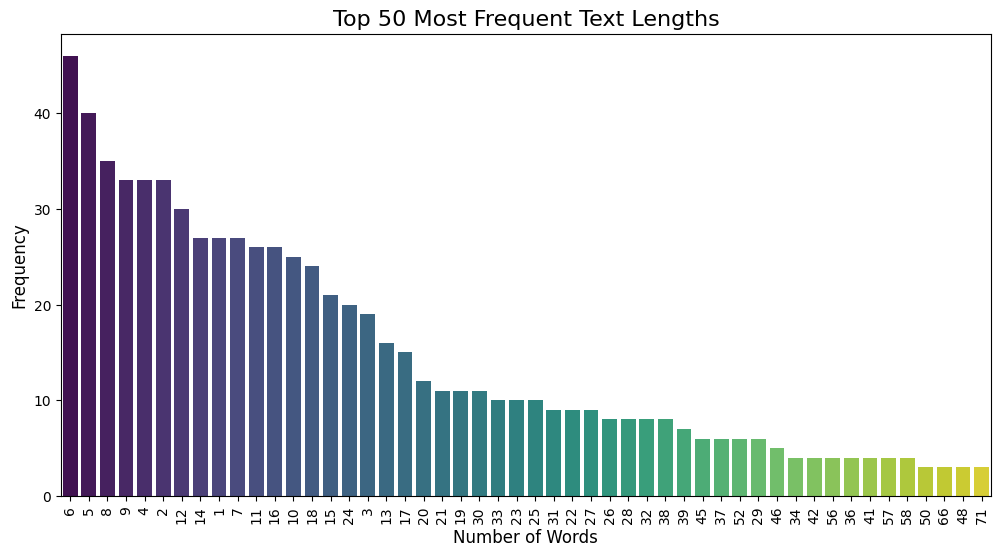

In [229]:
import matplotlib.pyplot as plt
import seaborn as sns
# 新增一欄 text_len 表示每筆文字的字數
df['text_len'] = df['text'].apply(lambda x: len(str(x).split()))

# 計算文字長度頻率
length_counts = df['text_len'].value_counts()  # 頻率
top_n = 50
length_counts_top = length_counts.head(top_n)  # 取前 50 頻率最高

plt.figure(figsize=(12,6))
sns.barplot(
    x=length_counts_top.index, 
    y=length_counts_top.values, 
    palette='viridis',
    order=length_counts_top.index  # 按頻率高到低排列
)
plt.title("Top 50 Most Frequent Text Lengths", fontsize=16)
plt.xlabel("Number of Words", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.xticks(rotation=90)
plt.show()


# Phase 2

In [ ]:
### Begin Assignment Here